# Churn Reduction

In [1]:
## Imports.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.model_selection import StratifiedKFold
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
## Reading the data.

churn_data = pd.read_csv('Train_data.csv')
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Change of column names 
For the ease of use during analysis

In [3]:
churn_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [4]:
churn_data.columns = ['State', 'Account_length', 'Area_code', 'Phone_number', 'Intl_plan', 'Voicemail_plan',
                      'Number_vmail_message', 'Day_mins', 'Day_calls', 'Day_charges', 'Eve_mins', 
                      'Eve_calls', 'Eve_charges', 'Night_mins', 'Night_calls', 'Night_charges', 'Intl_mins', 
                      'Intl_calls', 'Intl_charges', 'Cust_serv_calls', 'Churn']

In [5]:
## These columns we of binary nature i.e either of (yes/no) type or (True/False) type.
## These have been changed to 1 (for yes and True) and 2 (for no and False).

churn_data.Intl_plan = churn_data.Intl_plan.replace(churn_data.Intl_plan.unique(), (0, 1))
churn_data.Voicemail_plan = churn_data.Voicemail_plan.replace(churn_data.Voicemail_plan.unique(), (1, 0))
churn_data.Churn = churn_data.Churn.replace(churn_data.Churn.unique() , (0, 1))

## Transforming the Labels of states as integers
churn_data.State = LabelEncoder().fit_transform(churn_data.State)

In [6]:
## The columns that are categorical in nature are changed to such.

churn_data.State = churn_data.State.astype('category')
churn_data.Area_code = churn_data.Area_code.astype('category')
churn_data.Intl_plan = churn_data.Intl_plan.astype('category')
churn_data.Voicemail_plan = churn_data.Voicemail_plan.astype('category')
churn_data.Churn = churn_data.Churn.astype('category')

In [7]:
churn_data.head()

,State,Account_length,Area_code,Phone_number,Intl_plan,Voicemail_plan,Number_vmail_message,Day_mins,Day_calls,Day_charges,...,Eve_calls,Eve_charges,Night_mins,Night_calls,Night_charges,Intl_mins,Intl_calls,Intl_charges,Cust_serv_calls,Churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                   3333 non-null category
Account_length          3333 non-null int64
Area_code               3333 non-null category
Phone_number            3333 non-null object
Intl_plan               3333 non-null category
Voicemail_plan          3333 non-null category
Number_vmail_message    3333 non-null int64
Day_mins                3333 non-null float64
Day_calls               3333 non-null int64
Day_charges             3333 non-null float64
Eve_mins                3333 non-null float64
Eve_calls               3333 non-null int64
Eve_charges             3333 non-null float64
Night_mins              3333 non-null float64
Night_calls             3333 non-null int64
Night_charges           3333 non-null float64
Intl_mins               3333 non-null float64
Intl_calls              3333 non-null int64
Intl_charges            3333 non-null float64
Cust_serv_calls         3333

In [9]:
churn_test = pd.read_csv('./Test_data.csv')
churn_test.columns = ['State', 'Account_length', 'Area_code', 'Phone_number', 'Intl_plan', 'Voicemail_plan',
                      'Number_vmail_message', 'Day_mins', 'Day_calls', 'Day_charges', 'Eve_mins', 
                      'Eve_calls', 'Eve_charges', 'Night_mins', 'Night_calls', 'Night_charges', 'Intl_mins', 
                      'Intl_calls', 'Intl_charges', 'Cust_serv_calls', 'Churn']

In [10]:
## Converting the categorical features into levels
churn_test.Intl_plan = churn_test.Intl_plan.replace(churn_test.Intl_plan.unique(), (0, 1))
churn_test.Voicemail_plan = churn_test.Voicemail_plan.replace(churn_test.Voicemail_plan.unique(), (1, 0))
churn_test.Churn = churn_test.Churn.replace(churn_test.Churn.unique(), (0, 1))

churn_test.State = LabelEncoder().fit_transform(churn_test.State)

In [11]:
churn_test.State = churn_test.State.astype('category')
churn_test.Area_code = churn_test.Area_code.astype('category')
churn_test.Intl_plan = churn_test.Intl_plan.astype('category')
churn_test.Voicemail_plan = churn_test.Voicemail_plan.astype('category')
churn_test.Churn = churn_test.Churn.astype('category')

In [12]:
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 21 columns):
State                   1667 non-null category
Account_length          1667 non-null int64
Area_code               1667 non-null category
Phone_number            1667 non-null object
Intl_plan               1667 non-null category
Voicemail_plan          1667 non-null category
Number_vmail_message    1667 non-null int64
Day_mins                1667 non-null float64
Day_calls               1667 non-null int64
Day_charges             1667 non-null float64
Eve_mins                1667 non-null float64
Eve_calls               1667 non-null int64
Eve_charges             1667 non-null float64
Night_mins              1667 non-null float64
Night_calls             1667 non-null int64
Night_charges           1667 non-null float64
Intl_mins               1667 non-null float64
Intl_calls              1667 non-null int64
Intl_charges            1667 non-null float64
Cust_serv_calls         1667

In [13]:
churn_test.head()

,State,Account_length,Area_code,Phone_number,Intl_plan,Voicemail_plan,Number_vmail_message,Day_mins,Day_calls,Day_charges,...,Eve_calls,Eve_charges,Night_mins,Night_calls,Night_charges,Intl_mins,Intl_calls,Intl_charges,Cust_serv_calls,Churn
0,11,101,510,354-8815,0,1,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,26,137,510,381-7211,0,1,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,35,103,408,411-9481,0,0,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,32,99,415,418-9100,0,1,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,40,108,415,413-3643,0,1,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


### No missing Value
From the above table, we infer that in the given data has no missing values.


### Outlier Analysis

In [14]:
def fivePtAnalysis(x, y):
    ## Plotting a boxplot for each feature.
    plt.figure()
    print("\n", y)
    plt.boxplot(x)
    plt.show()
    
    ## Calculating the maximum and minimum for a feature.
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    maxm, minm = q3 + (1.5 * iqr), q1 - (1.5 * iqr)
    return (maxm, minm)

In [15]:
def neutralizeOutliers(x, y, max_val, min_val):
    ## Finding the indices of the outliers in a feature.
    max_in = churn_data[x > max_val].index
    min_in = churn_data[x < min_val].index
    print("\tOutliers above maximum : ", len(max_in))
    print("\tOutliers below minimum : ", len(min_in))
    
    ## Rounding the maximum and minimum to ceiling.
    if x.dtype == 'int64':
        max_val, min_val = round(max_val), round(min_val)
    col_type = x.dtype
    
    ## The ouliers lying beyond the maximum limit are reduced to the maximum.
    if len(max_in) > 0:
        for i in max_in:
            churn_data[y].iloc[i] = max_val
    
    ## The outliers lying beyond the minimum limit are increased to the minimum.
    if len(min_in) > 0:
        for i in min_in:
            churn_data[y].iloc[i] = min_val
    return col_type


 Account_length


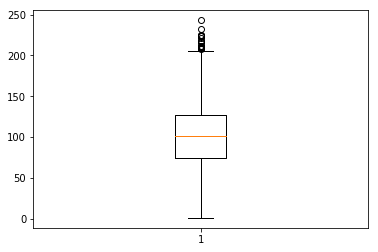

	Outliers above maximum :  18
	Outliers below minimum :  0


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



 Number_vmail_message


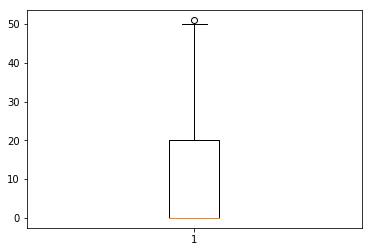

	Outliers above maximum :  1
	Outliers below minimum :  0

 Day_mins


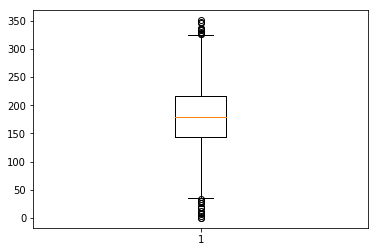

	Outliers above maximum :  11
	Outliers below minimum :  14

 Day_calls


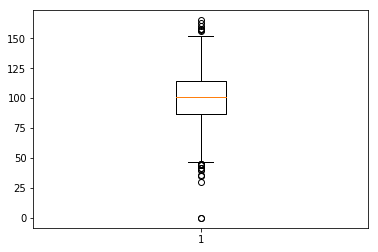

	Outliers above maximum :  8
	Outliers below minimum :  15

 Day_charges


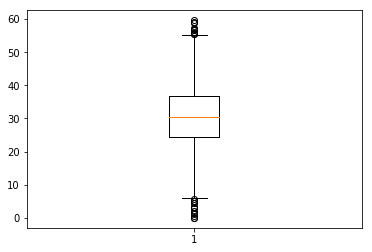

	Outliers above maximum :  11
	Outliers below minimum :  14

 Eve_mins


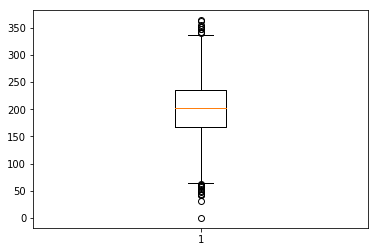

	Outliers above maximum :  10
	Outliers below minimum :  14

 Eve_calls


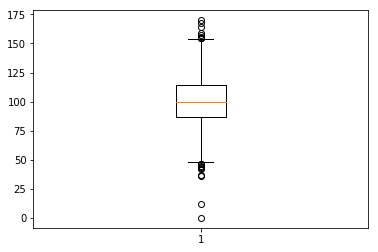

	Outliers above maximum :  9
	Outliers below minimum :  11

 Eve_charges


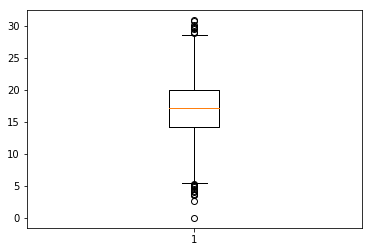

	Outliers above maximum :  10
	Outliers below minimum :  14

 Night_mins


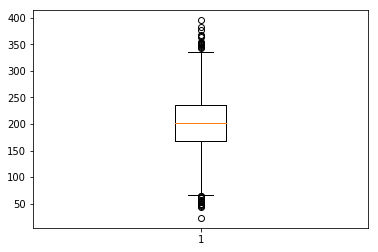

	Outliers above maximum :  15
	Outliers below minimum :  15

 Night_calls


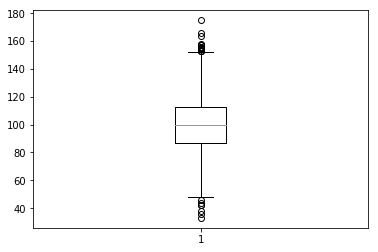

	Outliers above maximum :  15
	Outliers below minimum :  7

 Night_charges


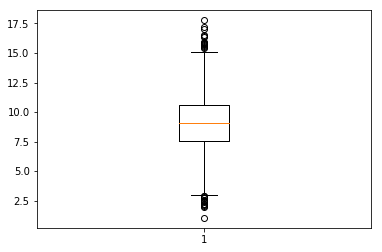

	Outliers above maximum :  15
	Outliers below minimum :  15

 Intl_mins


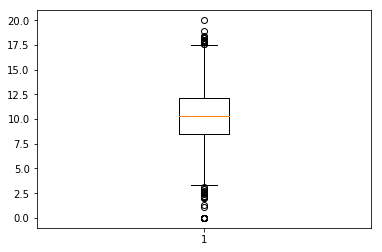

	Outliers above maximum :  14
	Outliers below minimum :  32

 Intl_calls


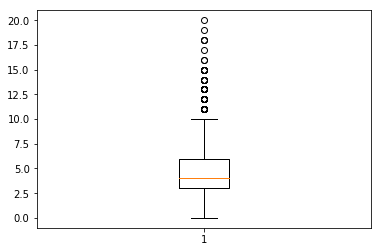

	Outliers above maximum :  78
	Outliers below minimum :  0

 Intl_charges


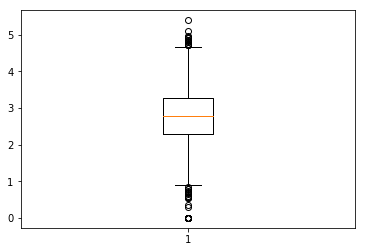

	Outliers above maximum :  17
	Outliers below minimum :  32

 Cust_serv_calls


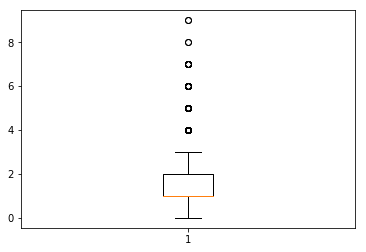

	Outliers above maximum :  267
	Outliers below minimum :  0


In [16]:
for i in churn_data:
    ## The outlier analysis is done for all numerical features
    if churn_data[i].dtype == 'float64' or churn_data[i].dtype == 'int64':
        max_val, min_val = fivePtAnalysis(churn_data[i], i)
        col_type = neutralizeOutliers(churn_data[i], i, max_val, min_val)
        if col_type == 'int64':
            churn_data[i] = churn_data[i].astype('int64')

In [17]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                   3333 non-null category
Account_length          3333 non-null int64
Area_code               3333 non-null category
Phone_number            3333 non-null object
Intl_plan               3333 non-null category
Voicemail_plan          3333 non-null category
Number_vmail_message    3333 non-null int64
Day_mins                3333 non-null float64
Day_calls               3333 non-null int64
Day_charges             3333 non-null float64
Eve_mins                3333 non-null float64
Eve_calls               3333 non-null int64
Eve_charges             3333 non-null float64
Night_mins              3333 non-null float64
Night_calls             3333 non-null int64
Night_charges           3333 non-null float64
Intl_mins               3333 non-null float64
Intl_calls              3333 non-null int64
Intl_charges            3333 non-null float64
Cust_serv_calls         3333

In [18]:
## Style of graphs
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [19]:
churn_data.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

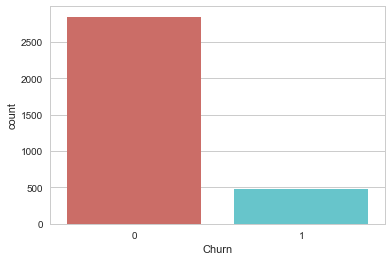

In [20]:
## Distribution of classes.
sns.countplot(x='Churn', data=churn_data, palette='hls')
plt.show()

In [21]:
churn_data.groupby('Churn').mean()

,Account_length,Number_vmail_message,Day_mins,Day_calls,Day_charges,Eve_mins,Eve_calls,Eve_charges,Night_mins,Night_calls,Night_charges,Intl_mins,Intl_calls,Intl_charges,Cust_serv_calls
Churn,,,,,,,,,,,,,,,
0,100.735439,8.604211,175.251526,100.308772,29.793302,199.098684,100.064912,16.923607,200.081860,100.049474,9.003796,10.180035,4.468772,2.749198,1.429474
1,102.565217,5.115942,206.750311,101.422360,35.148116,212.284783,100.521739,18.044327,205.231677,100.387164,9.235549,10.694410,4.084886,2.888054,2.028986


In [22]:
## Distribution of classes for each state.
churn_data.groupby(['State', 'Churn']).mean()

Account_length  Number_vmail_message    Day_mins   Day_calls  \
State Churn                                                                 
0     0           94.693878              9.612245  179.516327   95.591837   
      1          138.000000              0.000000  159.900000   90.000000   
1     0           98.125000              7.569444  183.825000   99.388889   
      1           97.125000              3.625000  205.675000   96.500000   
2     0           94.840909              8.340909  175.477273  101.909091   
      1          105.545455              2.636364  178.672727  103.090909   
3     0          102.166667             10.100000  169.700000   99.366667   
      1           75.000000              0.000000  200.175000  109.000000   
4     0           98.160000             10.280000  181.132000  106.400000   
      1          102.222222              5.444444  190.322222   99.666667   
5     0           99.596491              9.157895  172.581579   96.228070   
      1          121.222222              3.333333  215.138889   88.111111   
6     0           99.806452             10.225806  163.851613   96.870968   
      1           94.583333              3.083333  233.466667  106.500000   
7     0          109.224490             10.734694  169.622449   99.387755   
      1           69.200000              0.000000  188.600000  107.800000   
8     0          101.423077              7.500000  173.242308  100.307692   
      1          102.777778              3.888889  181.350000   89.444444   
9     0          109.163636              9.345455  177.338182  101.781818   
      1          112.375000             10.125000  194.625000   95.625000   
10    0          104.195652             10.913043  178.560870  103.173913   
      1          100.125000              4.875000  222.200000  102.375000   
11    0          105.560000              8.340000  172.348000  102.420000   
      1          104.000000              0.000000  236.200000  110.000000   
12    0           97.195122              8.365854  172.568293  100.951220   
      1           55.000000              0.000000  246.566667  131.666667   
13    0          103.437500             10.750000  177.485937  106.140625   
      1          110.000000              6.444444  186.677778  106.777778   
14    0          101.641509              7.169811  171.698113  100.245283   
      1           88.600000              9.600000  193.660000  117.000000   
...                     ...                   ...         ...         ...   
36    0          109.538462              9.615385  175.420192  101.269231   
      1          100.888889              3.111111  208.927778   94.444444   
37    0          100.567164              6.343284  166.702239   96.432836   
      1          104.818182              5.181818  236.390909   91.636364   
38    0          105.513514              8.027027  187.508108   99.000000   
      1           97.250000              5.000000  192.387500   97.125000   
39    0           99.796610              8.067797  164.216949  101.135593   
      1          122.666667              0.000000  199.550000   93.500000   
40    0           91.978261             10.717391  152.532609   99.956522   
      1          112.928571              2.000000  213.564286  110.785714   
41    0          107.153846             10.500000  187.982692   95.038462   
      1           92.125000             10.000000  204.787500   99.125000   
42    0           93.270833              6.416667  172.329167  101.375000   
      1           87.400000             13.000000  208.820000  102.200000   
43    0           95.018519              7.537037  169.875926  100.518519   
      1          104.388889              3.166667  216.380556   98.388889   
44    0           99.903226              8.580645  180.277419  100.516129   
      1          103.800000              8.000000  203.980000   90.100000   
45    0          107.444444              6.944444  176.845833  104.652778   
      1  

In [23]:
## Distribution of classes for each area code.
churn_data.groupby(['Area_code','Churn']).mean()

Account_length  Number_vmail_message    Day_mins   Day_calls  \
Area_code Churn                                                                 
408       0          101.177374              8.025140  172.138408  100.141061   
          1          105.647541              5.573770  206.915574  102.819672   
415       0          100.558140              9.038055  176.859302  100.603946   
          1          103.838983              4.262712  210.282415  100.567797   
510       0          100.644755              8.323077  175.178182   99.890909   
          1           97.152000              6.280000  199.920400  101.672000   

                 Day_charges    Eve_mins   Eve_calls  Eve_charges  Night_mins  \
Area_code Churn                                                                 
408       0        29.263966  199.596159  100.044693    16.965824  198.453980   
          1        35.176230  211.169262   98.434426    17.949508  203.300410   
415       0        30.066688  198.749471  100.428471    16.893862  201.230162   
          1        35.748517  212.498093  101.101695    18.062331  206.805508   
510       0        29.780811  199.293566   99.363636    16.940364  199.433077   
          1        33.987120  212.970800  101.464000    18.102880  204.145200   

                 Night_calls  Night_charges  Intl_mins  Intl_calls  \
Area_code Churn                                                      
408       0        99.286313       8.930594  10.099721    4.416201   
          1        97.647541       9.148484  10.423770    4.008197   
415       0       100.280479       9.055476  10.274489    4.525018   
          1       101.021186       9.306568  10.866102    4.224576   
510       0       100.355245       8.974538  10.073007    4.409790   
          1       101.864000       9.186440  10.634400    3.896000   

                 Intl_charges  Cust_serv_calls  
Area_code Churn                                 
408       0          2.727556         1.386872  
          1          2.815492         1.942623  
415       0          2.774746         1.419309  
          1          2.934280         2.042373  
510       0          2.720168         1.492308  
          1          2.871600         2.088000

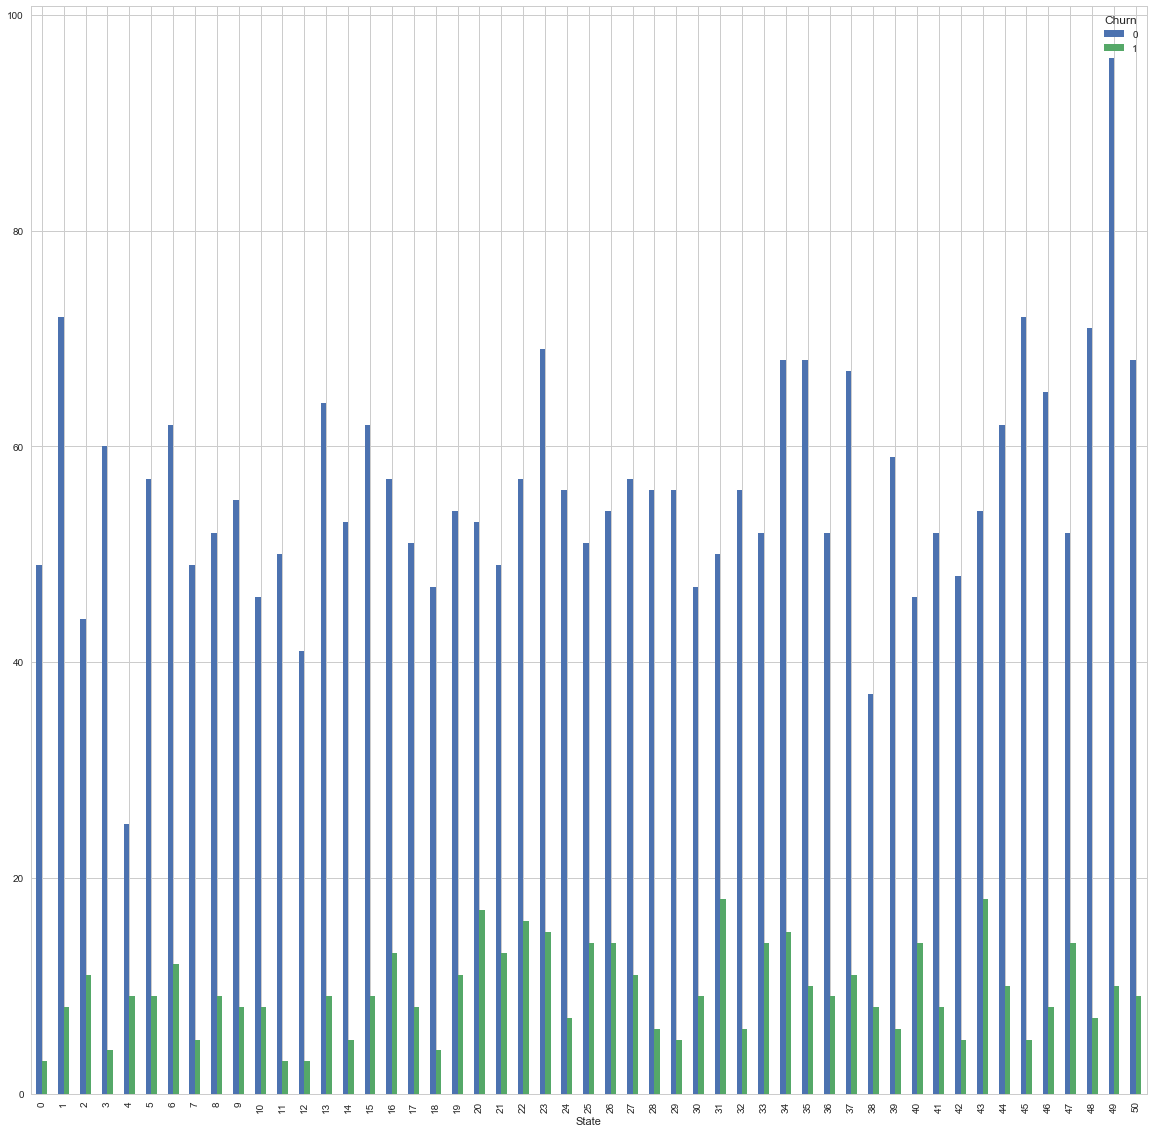

In [24]:
pd.crosstab(churn_data.State, churn_data.Churn).plot(kind="bar", figsize=(20,20))
plt.show()

In [25]:
## Distribution of classes based on precription of International Plan.
churn_data.groupby(['Intl_plan', 'Churn']).mean()

Account_length  Number_vmail_message    Day_mins   Day_calls  \
Intl_plan Churn                                                                 
0         0          100.545420              8.580706  174.643994  100.186937   
          1          101.690751              4.046243  212.066185  102.453757   
1         0          103.456989              8.940860  183.952957  102.053763   
          1          104.773723              7.817518  193.324818   98.817518   

                 Day_charges    Eve_mins   Eve_calls  Eve_charges  Night_mins  \
Intl_plan Churn                                                                 
0         0        29.690015  199.035342   99.982357    16.918221  200.257020   
          1        36.051821  213.578324  100.959538    18.154191  209.425434   
1         0        31.272634  200.005914  101.247312    17.000753  197.573118   
          1        32.865766  209.017883   99.416058    17.766861  194.640146   

                 Night_calls  Night_charges  Intl_mins  Intl_calls  \
Intl_plan Churn                                                      
0         0        99.999625       9.011685  10.207057    4.429429   
          1       100.161850       9.424306  10.272254    4.190751   
1         0       100.763441       8.890806   9.793011    5.032258   
          1       100.956204       8.758832  11.760584    3.817518   

                 Intl_charges  Cust_serv_calls  
Intl_plan Churn                                 
0         0          2.756496         1.434309  
          1          2.774277         2.228324  
1         0          2.644677         1.360215  
          1          3.175401         1.525547

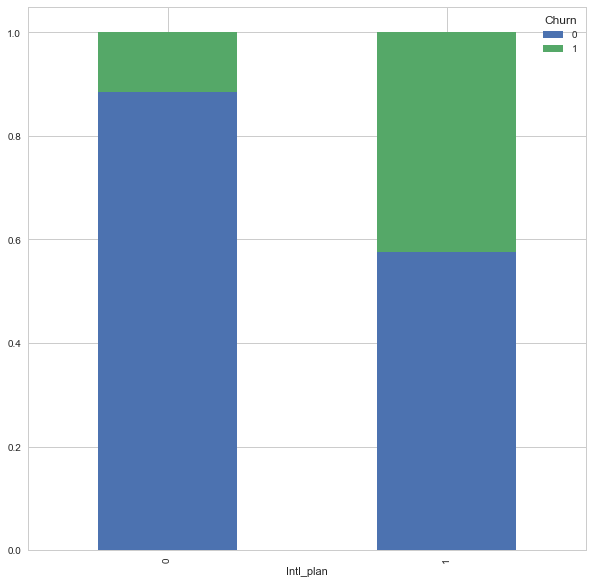

In [26]:
table = pd.crosstab(churn_data.Intl_plan, churn_data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,10));

In [27]:
## Distribution of classes based on precription of International Plan.
churn_data.groupby(['Voicemail_plan','Churn']).mean()

Account_length  Number_vmail_message    Day_mins  \
Voicemail_plan Churn                                                     
0              0          100.665837              0.000000  173.263596   
               1          102.138958              0.000000  212.738462   
1              0          100.901425             29.123515  179.992340   
               1          104.712500             30.887500  176.585000   

                       Day_calls  Day_charges    Eve_mins   Eve_calls  \
Voicemail_plan Churn                                                    
0              0      100.445219    29.455378  197.571887  100.176793   
               1      101.459057    36.166030  214.200868  100.434243   
1              0       99.983373    30.599181  202.739786   99.798100   
               1      101.237500    30.020375  202.632500  100.962500   

                      Eve_charges  Night_mins  Night_calls  Night_charges  \
Voicemail_plan Churn                                                        
0              0        16.793800  199.252067    99.876992       8.966467   
               1        18.207122  207.613896   100.076923       9.342854   
1              0        17.233171  202.060748   100.460808       9.092821   
               1        17.224250  193.231250   101.950000       8.695000   

                      Intl_mins  Intl_calls  Intl_charges  Cust_serv_calls  
Voicemail_plan Churn                                                        
0              0      10.188048    4.487550      2.751345         1.444721  
               1      10.611166    4.019851      2.865596         1.977667  
1              0      10.160926    4.423990      2.744080         1.393112  
               1      11.113750    4.412500      3.001187         2.287500

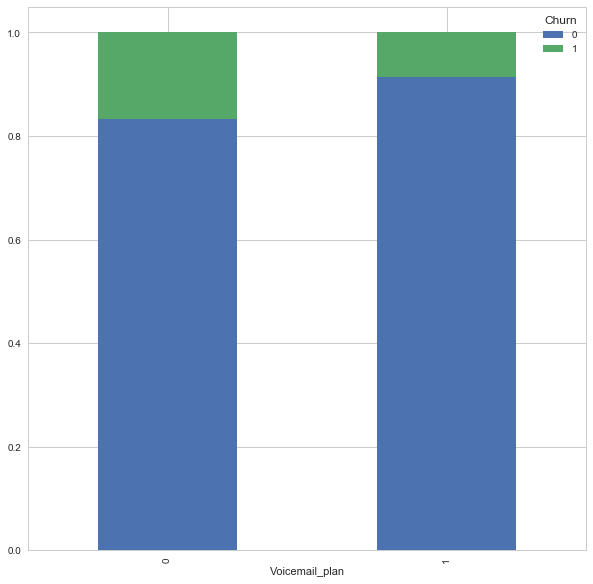

In [28]:
table = pd.crosstab(churn_data.Voicemail_plan, churn_data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,10));

In [29]:
## Separating the target variable.
target_churn = churn_data['Churn']
target_test_churn = churn_test['Churn']

In [30]:
## Feature set.
feat_churn = churn_data.drop(['Churn'], axis =1 )
feat_test_churn = churn_test.drop(['Churn'], axis =1)

In [31]:
## Calculating charges per minute.
churn_data['Day_charge_min'] = churn_data['Day_charges'] / churn_data['Day_mins']
churn_test['Day_charge_min'] = churn_test['Day_charges'] / churn_test['Day_mins']

churn_data['Eve_charge_min'] = churn_data['Eve_charges'] / churn_data['Eve_mins']
churn_test['Eve_charge_min'] = churn_test['Eve_charges'] / churn_test['Eve_mins']

churn_data['Night_charge_min'] = churn_data['Night_charges'] / churn_data['Night_mins']
churn_test['Night_charge_min'] = churn_test['Night_charges'] / churn_test['Night_mins']

churn_data['Intl_charge_min'] = churn_data['Intl_charges'] / churn_data['Intl_mins']
churn_test['Intl_charge_min'] = churn_test['Intl_charges'] / churn_test['Intl_mins']

In [32]:
## Dropping some features due to two reasons.
## Phone number is dropped because it is like a id.
## Rest are dropped because the features or their derivatives are used.
churn_data = churn_data.drop(['Phone_number', 'Area_code', 'Day_charges', 'Eve_charges',
                              'Night_charges', 'Intl_charges'], axis = 1)
churn_test = churn_test.drop(['Phone_number', 'Area_code', 'Day_charges', 'Eve_charges',
                              'Night_charges', 'Intl_charges'], axis = 1)

In [33]:
## Another feature set  with charges per minutes used
feat_churn_1 = churn_data.drop(['Churn'], axis = 1)
feat_test_churn_1 = churn_test.drop(['Churn'], axis = 1)

In [34]:
## Phone number and area code are removed from first feature set. 
feat_churn =feat_churn.drop(['Phone_number', 'Area_code'], axis =1)
feat_test_churn =feat_test_churn.drop(['Phone_number', 'Area_code'], axis =1)

In [35]:
## Feature Scaling.
X = feat_churn.as_matrix().astype(np.float)
y = target_churn.as_matrix().astype(np.float)
X = StandardScaler().fit_transform(X)

In [36]:
## Stratified sampling. 
skfold = StratifiedKFold(n_splits=4)

In [37]:
def confusionMatrix(X, y, model, model_name):
    y_pred = y.copy()
    for train, test in skfold.split(X,y):
        X_tr, X_te = X[train,:], X[test,:]
        y_tr = y[train]
        clf = model()
        clf.fit(X_tr, y_tr)
        y_pred[test] = clf.predict(X_te)
    print(model_name,'\nAccuracy Score\t{:.3f}'.format(accuracy_score(y, y_pred)))
    print('\nConfusion Matrix', '\n', confusion_matrix(y, y_pred))
    plotConfusionHeatMap(confusion_matrix(y, y_pred), model_name)
    print('\nClassification Report\n{}'.format(classification_report(y, y_pred)), '\n\n')

In [49]:
def plotConfusionHeatMap(conf_matrix, model_name):
    plt.figure(figsize=(5,5))
    plt.title(model_name)
    sns.heatmap(conf_matrix, annot=True, fmt='')
    plt.show()

SUPPORT VECTOR CLASSIFIER 
Accuracy Score	0.916

Confusion Matrix 
 [[2821   29]
 [ 252  231]]


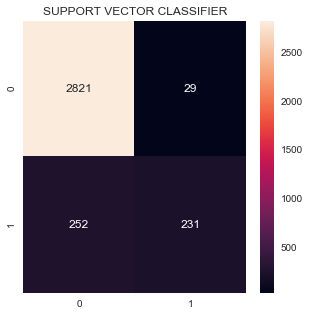


Classification Report
             precision    recall  f1-score   support

        0.0       0.92      0.99      0.95      2850
        1.0       0.89      0.48      0.62       483

avg / total       0.91      0.92      0.90      3333
 


K NEAREST NEIGHBOURS CLASSIFICATION 
Accuracy Score	0.887

Confusion Matrix 
 [[2796   54]
 [ 321  162]]


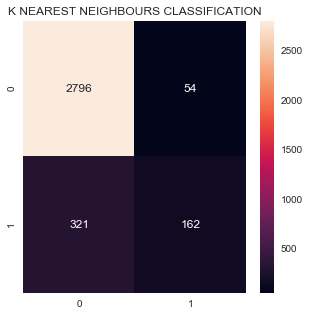


Classification Report
             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94      2850
        1.0       0.75      0.34      0.46       483

avg / total       0.88      0.89      0.87      3333
 


RANDOM FOREST CLASSIFICATION 
Accuracy Score	0.942

Confusion Matrix 
 [[2821   29]
 [ 165  318]]


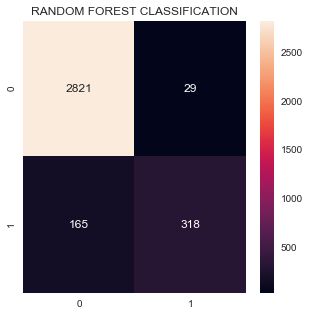


Classification Report
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.97      2850
        1.0       0.92      0.66      0.77       483

avg / total       0.94      0.94      0.94      3333
 


LOGISTIC REGRESSION 
Accuracy Score	0.863

Confusion Matrix 
 [[2778   72]
 [ 383  100]]


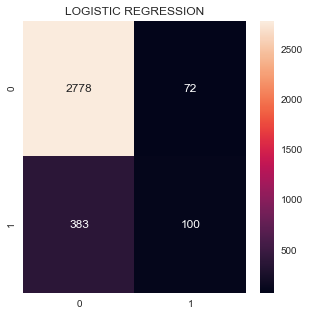


Classification Report
             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92      2850
        1.0       0.58      0.21      0.31       483

avg / total       0.84      0.86      0.83      3333
 


GAUSSIAN NAIVE BAYES CLASSIFICATION 
Accuracy Score	0.866

Confusion Matrix 
 [[2645  205]
 [ 241  242]]


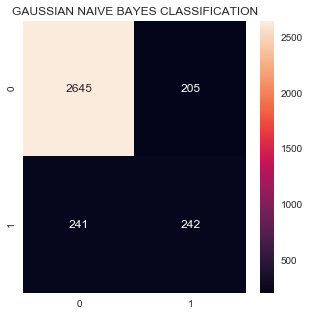


Classification Report
             precision    recall  f1-score   support

        0.0       0.92      0.93      0.92      2850
        1.0       0.54      0.50      0.52       483

avg / total       0.86      0.87      0.86      3333
 


DECISION TREE CLASSIFICATION 
Accuracy Score	0.911

Confusion Matrix 
 [[2687  163]
 [ 132  351]]


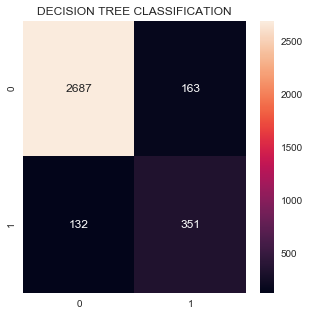


Classification Report
             precision    recall  f1-score   support

        0.0       0.95      0.94      0.95      2850
        1.0       0.68      0.73      0.70       483

avg / total       0.91      0.91      0.91      3333
 




In [50]:
## Finding accuracy of different algorithms using stratified sampling method.
confusionMatrix(X, y, SVC, 'SUPPORT VECTOR CLASSIFIER')
confusionMatrix(X, y, KNeighborsClassifier, 'K NEAREST NEIGHBOURS CLASSIFICATION')
confusionMatrix(X,y,RandomForestClassifier, 'RANDOM FOREST CLASSIFICATION')
confusionMatrix(X, y, LogisticRegression,'LOGISTIC REGRESSION')
confusionMatrix(X, y, GaussianNB, 'GAUSSIAN NAIVE BAYES CLASSIFICATION')
confusionMatrix(X, y, DecisionTreeClassifier, 'DECISION TREE CLASSIFICATION')

In [40]:
## Feature scaling for second feature set.
X_1 = feat_churn_1.as_matrix().astype(np.float)
X_1 = StandardScaler().fit_transform(X_1)

SUPPORT VECTOR CLASSIFIER 
Accuracy Score	0.896

Confusion Matrix 
 [[2813   37]
 [ 310  173]]


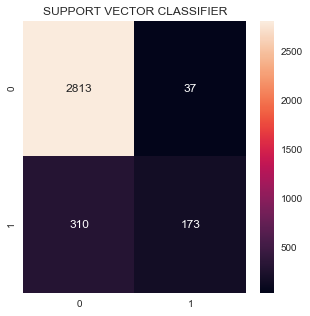


Classification Report
             precision    recall  f1-score   support

        0.0       0.90      0.99      0.94      2850
        1.0       0.82      0.36      0.50       483

avg / total       0.89      0.90      0.88      3333
 


K NEAREST NEIGHBOURS CLASSIFICATION 
Accuracy Score	0.869

Confusion Matrix 
 [[2797   53]
 [ 383  100]]


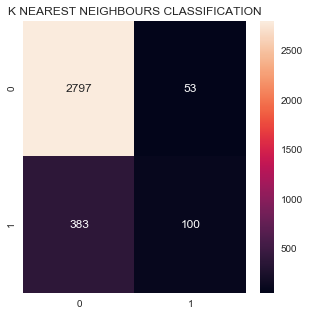


Classification Report
             precision    recall  f1-score   support

        0.0       0.88      0.98      0.93      2850
        1.0       0.65      0.21      0.31       483

avg / total       0.85      0.87      0.84      3333
 


RANDOM FOREST CLASSIFICATION 
Accuracy Score	0.935

Confusion Matrix 
 [[2820   30]
 [ 185  298]]


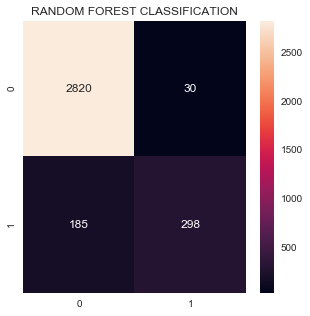


Classification Report
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96      2850
        1.0       0.91      0.62      0.73       483

avg / total       0.93      0.94      0.93      3333
 


LOGISTIC REGRESSION 
Accuracy Score	0.863

Confusion Matrix 
 [[2782   68]
 [ 387   96]]


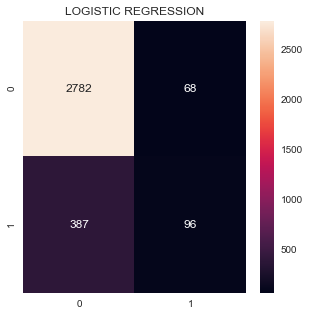


Classification Report
             precision    recall  f1-score   support

        0.0       0.88      0.98      0.92      2850
        1.0       0.59      0.20      0.30       483

avg / total       0.84      0.86      0.83      3333
 


GAUSSIAN NAIVE BAYES CLASSIFICATION 
Accuracy Score	0.847

Confusion Matrix 
 [[2649  201]
 [ 310  173]]


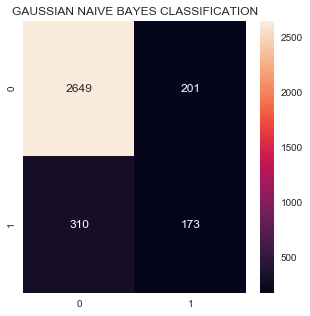


Classification Report
             precision    recall  f1-score   support

        0.0       0.90      0.93      0.91      2850
        1.0       0.46      0.36      0.40       483

avg / total       0.83      0.85      0.84      3333
 


DECISION TREE CLASSIFICATION 
Accuracy Score	0.911

Confusion Matrix 
 [[2693  157]
 [ 138  345]]


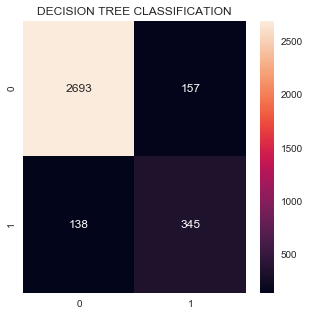


Classification Report
             precision    recall  f1-score   support

        0.0       0.95      0.94      0.95      2850
        1.0       0.69      0.71      0.70       483

avg / total       0.91      0.91      0.91      3333
 




In [51]:
## Finding accuracy of different algorithms using stratified sampling method.
confusionMatrix(X_1, y, SVC, 'SUPPORT VECTOR CLASSIFIER')
confusionMatrix(X_1, y, KNeighborsClassifier, 'K NEAREST NEIGHBOURS CLASSIFICATION')
confusionMatrix(X_1,y,RandomForestClassifier, 'RANDOM FOREST CLASSIFICATION')
confusionMatrix(X_1, y, LogisticRegression,'LOGISTIC REGRESSION')
confusionMatrix(X_1, y, GaussianNB, 'GAUSSIAN NAIVE BAYES CLASSIFICATION')
confusionMatrix(X_1, y, DecisionTreeClassifier, 'DECISION TREE CLASSIFICATION')

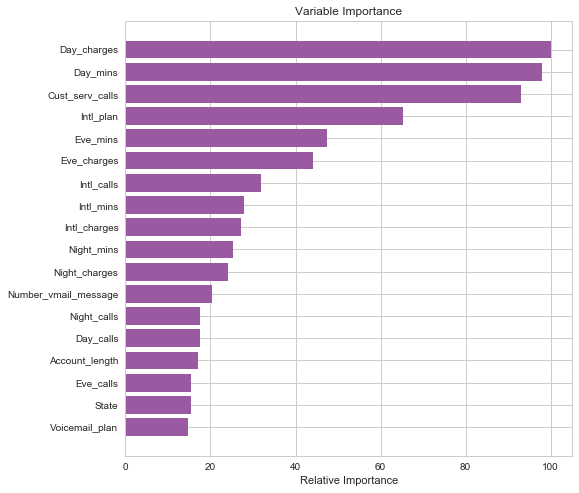

The mean accuracy : 93.22135572885422



In [52]:
## Choosing Random Forest Classification as it has highest accuracy of all classification.
## 500 decision tree are trained.
RF_model = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=10, warm_start=True)
RF_model.fit(X, y)

a = RF_model.feature_importances_
a = 100* (a/a.max())
sorted_idx = np.argsort(a)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(8, 8))
plt.barh(pos, a[sorted_idx], align='center', color='#9A5AA2')
plt.yticks(pos, np.asanyarray(feat_churn.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Testing the test dataset.
XX = feat_test_churn.as_matrix().astype(np.float)
XX = StandardScaler().fit_transform(XX)
a = RF_model.predict(XX)
print('The mean accuracy : {}\n'.format(RF_model.score(XX, target_test_churn.as_matrix().astype(np.float)) * 100))

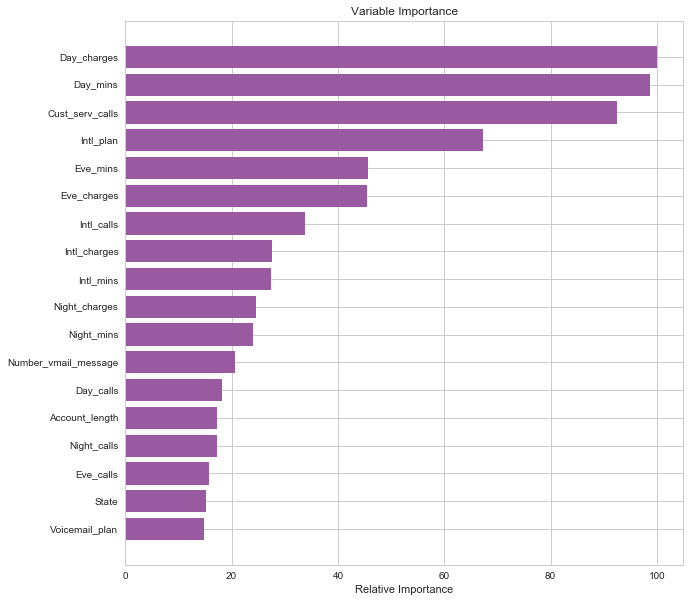

The mean accuracy : 93.04139172165566



In [43]:
RF_model = RandomForestClassifier(n_estimators=400, criterion='entropy', max_depth=10, warm_start=True)
RF_model.fit(X, y)

a = RF_model.feature_importances_
a = 100* (a/a.max())
sorted_idx = np.argsort(a)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 10))
plt.barh(pos, a[sorted_idx], align='center', color='#9A5AA2')
plt.yticks(pos, np.asanyarray(feat_churn.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

XX = feat_test_churn.as_matrix().astype(np.float)
XX = StandardScaler().fit_transform(XX)
a = RF_model.predict(XX)
print('The mean accuracy : {}\n'.format(RF_model.score(XX, target_test_churn.as_matrix().astype(np.float)) * 100))

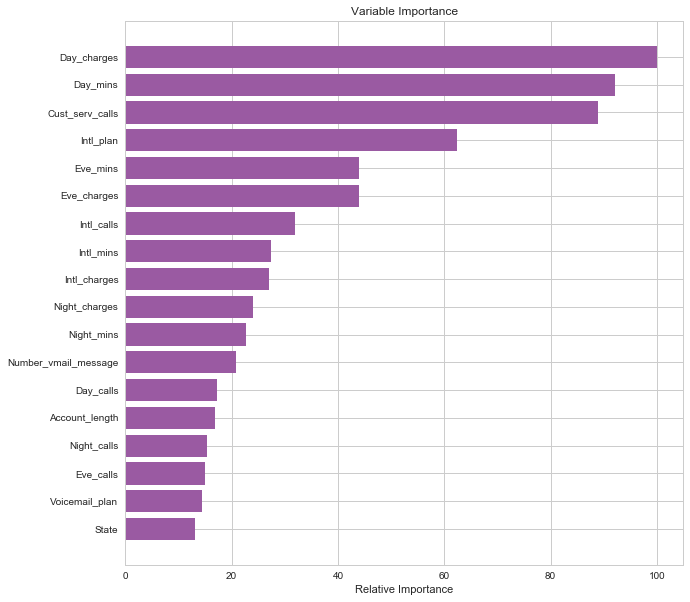

The mean accuracy : 93.34133173365326



In [44]:
RF_model = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, warm_start=True)
RF_model.fit(X, y)

a = RF_model.feature_importances_
a = 100* (a/a.max())
sorted_idx = np.argsort(a)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 10))
plt.barh(pos, a[sorted_idx], align='center', color='#9A5AA2')
plt.yticks(pos, np.asanyarray(feat_churn.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

XX = feat_test_churn.as_matrix().astype(np.float)
XX = StandardScaler().fit_transform(XX)
a = RF_model.predict(XX)
print('The mean accuracy : {}\n'.format(RF_model.score(XX, target_test_churn.as_matrix().astype(np.float)) * 100))

In [47]:
output_predictions = pd.Series(a)
output_predictions.to_csv("prediction output.csv")